In [2]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

In [3]:
# First, import TF and get its version.
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import regularizers
tf_version = tf.__version__
tf_version

'2.10.0'

In [4]:
print(tf.config.list_physical_devices('GPU'))

[]


## Loading the raw data

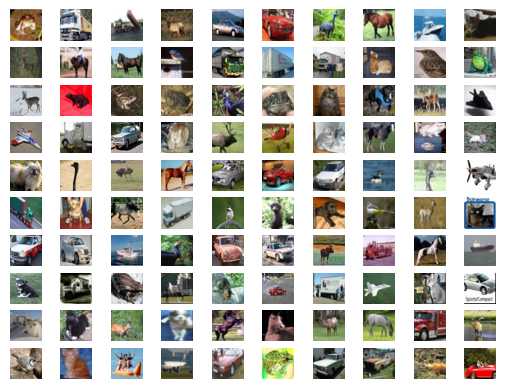

In [5]:

def show_imgs(X):
    plt.figure(1)
    k = 0
    for i in range(0,10):
        for j in range(0,10):
            plt.subplot2grid((10,10),(i,j))
            plt.imshow(X[k], cmap='gray')
            k = k+1
            plt.axis('off')
    plt.show()
    
# Load data & split data between train and test sets
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

show_imgs(X_train)

In [6]:
X_train =  X_train.reshape(50000, 32* 32* 3) #                     change the shape towards (60000, 784)
X_test =   X_test.reshape(10000, 32*32*3) # ...                   
X_train =  X_train.astype('float32')# ...                     change the type towards float32
X_test =   X_test.astype('float32')# ...                     idem
X_train /= 255.0# ...                     normalize the range to be between 0.0 and 1.0
X_test /=  255.0# ...
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

50000 train samples
10000 test samples


In [7]:
n_classes = 10
Y_train = keras.utils.to_categorical(y_train, n_classes)# ...                  modify targets to 1-hot using utils.to_categorical()
Y_test = keras.utils.to_categorical(y_test, n_classes)# ...                   idem 
print(Y_train[:10])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


## Two layer Network and Weight Visualisation

In [8]:
E = 30               # number of epochs
B = 128               # batch size
D = X_train.shape[1] # dimension of input sample

# ... define the model as a Sequential type

model = keras.models.Sequential()
model.add(keras.layers.Dense(128, input_shape=(D,), activation='relu'))
model.add(keras.layers.Dense(n_classes, activation='softmax'))

# ... print model information with summary() method
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               393344    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 394,634
Trainable params: 394,634
Non-trainable params: 0
_________________________________________________________________


## Compile and train the network

In [9]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
log = model.fit(X_train,Y_train, batch_size=B, epochs=E, verbose=1, validation_data=(X_test,Y_test))


Epoch 1/30
391/391 [==============================] - 2s 4ms/step - loss: 1.9626 - accuracy: 0.2930 - val_loss: 1.8887 - val_accuracy: 0.3407
Epoch 2/30
391/391 [==============================] - 1s 4ms/step - loss: 1.8087 - accuracy: 0.3615 - val_loss: 1.8115 - val_accuracy: 0.3645
Epoch 3/30
391/391 [==============================] - 2s 4ms/step - loss: 1.7566 - accuracy: 0.3821 - val_loss: 1.7204 - val_accuracy: 0.3893
Epoch 4/30
391/391 [==============================] - 1s 3ms/step - loss: 1.7093 - accuracy: 0.3955 - val_loss: 1.6774 - val_accuracy: 0.4131
Epoch 5/30
391/391 [==============================] - 1s 3ms/step - loss: 1.6772 - accuracy: 0.4073 - val_loss: 1.6645 - val_accuracy: 0.4083
Epoch 6/30
391/391 [==============================] - 2s 4ms/step - loss: 1.6653 - accuracy: 0.4131 - val_loss: 1.6511 - val_accuracy: 0.4135
Epoch 7/30
391/391 [==============================] - 1s 4ms/step - loss: 1.6413 - accuracy: 0.4212 - val_loss: 1.6506 - val_accuracy: 0.4169
Epoch 

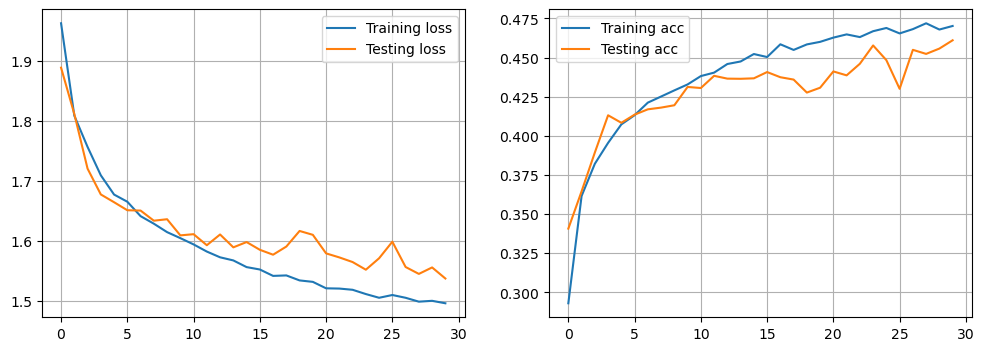

In [10]:
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(log.history['loss'], label='Training loss')
ax1.plot(log.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(log.history['accuracy'], label='Training acc')
ax2.plot(log.history['val_accuracy'], label='Testing acc')
ax2.legend()
ax2.grid()

In [11]:
loss_test, metric_test = model.evaluate(X_test, Y_test,verbose=1)    # ... evaluate model performance on test set, verbose tells progressbar of code, 0 means no progress bar, 1 means progressbar indicating the progress of evaluation, 2 means prints one line for every epoch during evaluation showing the overall progress.
print('Test loss:', loss_test)
print('Test accuracy:', metric_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.5374 - accuracy: 0.4610
Test loss: 1.5373660326004028
Test accuracy: 0.460999995470047


(3072, 128)
(128,)
(128, 10)
(10,)


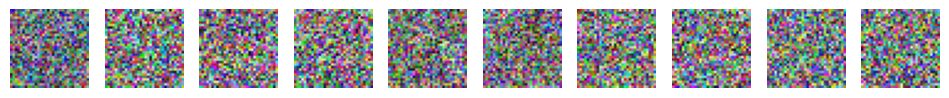

In [12]:
weights = model.get_weights()
for w in weights:
    print(w.shape)
w1 = weights[0]
f = plt.figure(figsize=(12,12))
for i in range(10):
    ax = f.add_subplot(1, 10, 1+i)
    im = w1[:,i]                  # get the weights landing to neuron i
    im = im.reshape(32,32,3)        # reshape the vector of weights into 28x28 image
    # now put back the pixel values to 0-256 doing a min-max norm and multiplying by 256
    min = np.min(im)
    max = np.max(im)
    im = np.round((im - min)/(max - min) * 255).astype(int)
    ax.axis('off')
    ax.imshow(im)

## Fine Tuning with Hyperparameters

### neurons = 200

In [13]:
E = 30               # number of epochs
B = 128               # batch size
D = X_train.shape[1] # dimension of input sample

# ... define the model as a Sequential type

model = keras.models.Sequential()
model.add(keras.layers.Dense(200, input_shape=(D,), activation='relu'))
model.add(keras.layers.Dense(n_classes, activation='softmax'))

# ... print model information with summary() method
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 200)               614600    
                                                                 
 dense_3 (Dense)             (None, 10)                2010      
                                                                 
Total params: 616,610
Trainable params: 616,610
Non-trainable params: 0
_________________________________________________________________


Epoch 1/30
391/391 [==============================] - 2s 5ms/step - loss: 1.9260 - accuracy: 0.3182 - val_loss: 1.7795 - val_accuracy: 0.3660
Epoch 2/30
391/391 [==============================] - 2s 5ms/step - loss: 1.7406 - accuracy: 0.3832 - val_loss: 1.6989 - val_accuracy: 0.3954
Epoch 3/30
391/391 [==============================] - 2s 5ms/step - loss: 1.6756 - accuracy: 0.4062 - val_loss: 1.6383 - val_accuracy: 0.4192
Epoch 4/30
391/391 [==============================] - 2s 5ms/step - loss: 1.6233 - accuracy: 0.4252 - val_loss: 1.6023 - val_accuracy: 0.4337
Epoch 5/30
391/391 [==============================] - 3s 6ms/step - loss: 1.5912 - accuracy: 0.4394 - val_loss: 1.5771 - val_accuracy: 0.4438
Epoch 6/30
391/391 [==============================] - 2s 5ms/step - loss: 1.5638 - accuracy: 0.4465 - val_loss: 1.5785 - val_accuracy: 0.4415
Epoch 7/30
391/391 [==============================] - 2s 5ms/step - loss: 1.5419 - accuracy: 0.4554 - val_loss: 1.5755 - val_accuracy: 0.4422
Epoch 

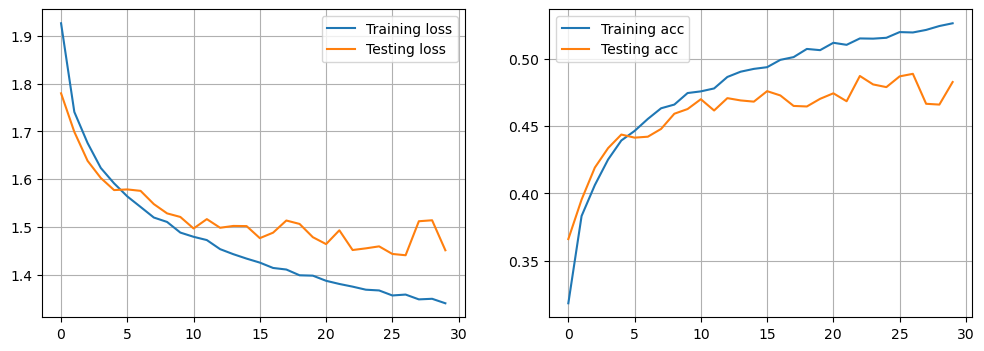

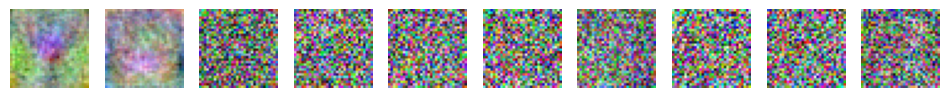

In [14]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
log = model.fit(X_train,Y_train, batch_size=B, epochs=E, verbose=1, validation_data=(X_test,Y_test))

f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(log.history['loss'], label='Training loss')
ax1.plot(log.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(log.history['accuracy'], label='Training acc')
ax2.plot(log.history['val_accuracy'], label='Testing acc')
ax2.legend()
ax2.grid()

weights = model.get_weights()
for w in weights:
    print(w.shape)
w1 = weights[0]
f = plt.figure(figsize=(12,12))
for i in range(10):
    ax = f.add_subplot(1, 10, 1+i)
    im = w1[:,i]                  # get the weights landing to neuron i
    im = im.reshape(32,32,3)        # reshape the vector of weights into 28x28 image
    # now put back the pixel values to 0-256 doing a min-max norm and multiplying by 256
    min = np.min(im)
    max = np.max(im)
    im = np.round((im - min)/(max - min) * 255).astype(int)
    ax.axis('off')
    ax.imshow(im)

### neurons = 300, two more fully connected layer

In [16]:
E = 30               # number of epochs
B = 128               # batch size
D = X_train.shape[1] # dimension of input sample

# ... define the model as a Sequential type

model = keras.models.Sequential()
model.add(keras.layers.Dense(300, input_shape=(D,), activation='relu'))
model.add(keras.layers.Dense(200, activation='relu'))
model.add(keras.layers.Dense(200, activation='relu'))
model.add(keras.layers.Dense(n_classes, activation='softmax'))

# ... print model information with summary() method
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 300)               921900    
                                                                 
 dense_9 (Dense)             (None, 200)               60200     
                                                                 
 dense_10 (Dense)            (None, 200)               40200     
                                                                 
 dense_11 (Dense)            (None, 10)                2010      
                                                                 
Total params: 1,024,310
Trainable params: 1,024,310
Non-trainable params: 0
_________________________________________________________________


Epoch 1/30
391/391 [==============================] - 3s 7ms/step - loss: 1.8634 - accuracy: 0.3269 - val_loss: 1.7281 - val_accuracy: 0.3765
Epoch 2/30
391/391 [==============================] - 3s 6ms/step - loss: 1.6706 - accuracy: 0.4021 - val_loss: 1.5774 - val_accuracy: 0.4379
Epoch 3/30
391/391 [==============================] - 3s 6ms/step - loss: 1.5853 - accuracy: 0.4337 - val_loss: 1.5846 - val_accuracy: 0.4389
Epoch 4/30
391/391 [==============================] - 2s 6ms/step - loss: 1.5273 - accuracy: 0.4523 - val_loss: 1.5161 - val_accuracy: 0.4603
Epoch 5/30
391/391 [==============================] - 3s 6ms/step - loss: 1.4846 - accuracy: 0.4690 - val_loss: 1.4990 - val_accuracy: 0.4664
Epoch 6/30
391/391 [==============================] - 3s 6ms/step - loss: 1.4465 - accuracy: 0.4849 - val_loss: 1.4720 - val_accuracy: 0.4732
Epoch 7/30
391/391 [==============================] - 3s 6ms/step - loss: 1.4122 - accuracy: 0.4983 - val_loss: 1.5138 - val_accuracy: 0.4668
Epoch 

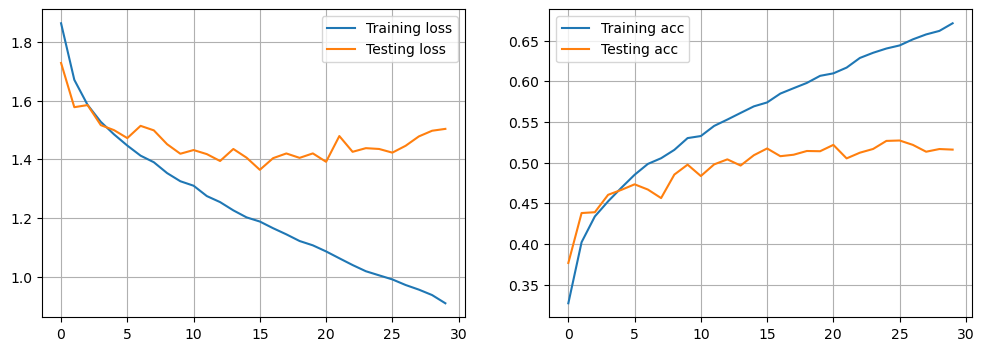

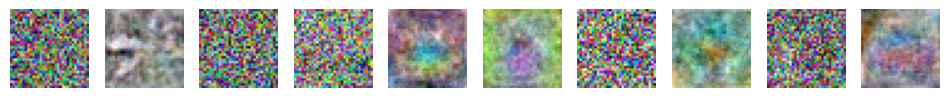

In [17]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
log = model.fit(X_train,Y_train, batch_size=B, epochs=E, verbose=1, validation_data=(X_test,Y_test))

f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(log.history['loss'], label='Training loss')
ax1.plot(log.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(log.history['accuracy'], label='Training acc')
ax2.plot(log.history['val_accuracy'], label='Testing acc')
ax2.legend()
ax2.grid()

weights = model.get_weights()
for w in weights:
    print(w.shape)
w1 = weights[0]
f = plt.figure(figsize=(12,12))
for i in range(10):
    ax = f.add_subplot(1, 10, 1+i)
    im = w1[:,i]                  # get the weights landing to neuron i
    im = im.reshape(32,32,3)        # reshape the vector of weights into 28x28 image
    # now put back the pixel values to 0-256 doing a min-max norm and multiplying by 256
    min = np.min(im)
    max = np.max(im)
    im = np.round((im - min)/(max - min) * 255).astype(int)
    ax.axis('off')
    ax.imshow(im)